In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import Libraries and dataset

In [40]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, plot_confusion_matrix
from sklearn.decomposition import PCA

In [14]:
# data from the feature engineering notebook
train_feat = pd.read_pickle("/content/drive/MyDrive/project/home-credit-default-risk/train_feat3.pkl")
train_lab = pd.read_pickle("/content/drive/MyDrive/project/home-credit-default-risk/train_lab3.pkl")
test_feat = pd.read_pickle("/content/drive/MyDrive/project/home-credit-default-risk/test_feat3.pkl")

In [15]:
# training-testing split
X_train, X_val, y_train, y_val = train_test_split(train_feat, train_lab, test_size = 0.3,random_state = 6420)

## Randomized Search

In [ ]:
# define function for randomized search
def classifier_RandomSearch(X_train_input, X_test_input, y_train_input,
                          classifier, param_grid, cv=KFold(n_splits=3, shuffle=True, random_state=6420)):

    clf = RandomizedSearchCV(estimator=classifier, param_distributions =param_grid, cv=cv, scoring='roc_auc',
                       verbose=1, n_iter=50)
    clf.fit(X_train_input, y_train_input)
    y_pred = clf.predict_proba(X_test_input)
    print(clf.best_estimator_, clf.best_score_)
    
    return clf, y_pred

In [ ]:
# PCA feature reduction, please skip. it was attempted, but did not improve performance
pca = PCA(70)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(test_feat)

In [ ]:
# Initial randomized search on 70% training data, yielding best model
lgbm = LGBMClassifier()
lgbm_grid = {'boosting_type': ['gbdt', 'dart', 'goss'],
             'num_leaves': range(20, 200, 20),
             'min_child_samples': range(100, 1000, 100),
             'min_child_weight': [0.001,0.01, 0.1, 1, 10],
             'scale_pos_weight': range(1, 15, 3),
             'learning_rate': [0.001, 0.01, 0.1],
             'n_estimators': [1000]}
lgb_model, lgb_pred = classifier_RandomSearch(X_train, X_val, y_train, lgbm, lgbm_grid)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 700.7min finished


LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=500, min_child_weight=10, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=140, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0) 0.7847769080373879


In [ ]:
# confusion matrix
lgb_model_train = LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=500, min_child_weight=10, min_split_gain=0.0,
               n_estimators=1500, n_jobs=-1, num_leaves=140, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
lgb_model_train.fit(X_train, y_train)


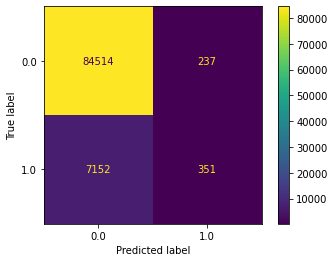

In [ ]:
plot_confusion_matrix(lgb_model_train, X_val, y_val, values_format='d')

In [ ]:
# 2000 estimators fitting all training data, 0.79247
lgb_model = LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=500, min_child_weight=10, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_leaves=140, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
lgb_model.fit(train_feat, train_lab)

LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=500, min_child_weight=10, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_leaves=140, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Best Model

In [16]:
# 1500 estimators fitting all training data 0.79339
# BEST model 
lgb_model = LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=500, min_child_weight=10, min_split_gain=0.0,
               n_estimators=1500, n_jobs=-1, num_leaves=140, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
lgb_model.fit(train_feat, train_lab)

LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=500, min_child_weight=10, min_split_gain=0.0,
               n_estimators=1500, n_jobs=-1, num_leaves=140, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [17]:
from sklearn.externals import joblib
joblib.dump(lgb_model, '/content/drive/MyDrive/project/best_model.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/MyDrive/project/best_model.pkl']

## Feature Importance

In [28]:
feat_imp = pd.DataFrame(sorted(zip(lgb_model.feature_importances_,train_feat.columns)), columns=['Value','Feature']).sort_values(by=['Value'], ascending=False)

In [45]:
feat_imp['weight'] = feat_imp['Value']/feat_imp['Value'].sum()

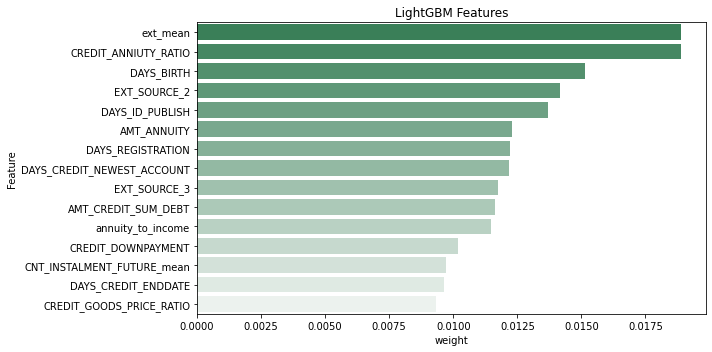

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x="weight", y="Feature", data=feat_imp.iloc[:][:15], palette="light:seagreen_r")
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [62]:
feat_imp.iloc[:][:15]['Value'].sum()/feat_imp['Value'].sum()

0.19118589511928338

## Cost Analysis

In [1]:
import numpy as np
confm_final = np.array([[84514, 237], [7152, 351]])
confm_naive = np.array([[84751, 0], [7503, 0]])
costm = np.array([[4548, -1000], [-26895, 0]])
# Source for profit per mortgage:
# https://www.cnbc.com/2020/09/10/mortgage-lenders-just-saw-record-profit-and-expect-to-do-better-in-the-next-quarter.html
# Source for loss per default mortgage (Table 9 avg for 2011-2013 - $*severity = loss):
# https://www.urban.org/sites/default/files/publication/39566/2000092-Loss-Severity-on-Residential-Mortgages.pdf
confm_final_norm = confm_final / confm_final.sum()
confm_naive_norm = confm_naive / confm_naive.sum()
cost_final = (confm_final_norm * costm).sum()
cost_naive = (confm_naive_norm * costm).sum()
pct_chg = (cost_final - cost_naive) / cost_naive * 100
print(pct_chg)
extra_profit = (cost_final - cost_naive) * 100000
print(extra_profit)

4.424217790023347
8807497.777874187


## Export Results

In [ ]:
#print(roc_auc_score(y_val, lgb_pred))
#plot_roc_curve(lgb_model, X_val_pca, y_val)
test = pd.read_csv("C:\\Users\\zheng\\Documents\\MSBA\\MSBA 6420 - Predictive Analytics\\project\\home-credit-default-risk\\application_test.csv")

In [ ]:
test = pd.DataFrame(test.iloc[:,0])

In [ ]:
pred = lgb_model.predict_proba(test_feat)

In [ ]:
answer = pd.DataFrame(data = pred, index = list(test['SK_ID_CURR'])).rename(columns={1:"TARGET"})

In [ ]:
answer = answer.drop([0],axis=1)

In [ ]:
answer.to_csv("answer.csv",header=True, index_label='SK_ID_CURR')